In [25]:
import pandas as pd
import statistics as sts

In [3]:
dataset = pd.read_csv("Churn.csv", delimiter = ";")

dataset.head()

#Anotação: Lembrar de colocar o delimitador.
                      

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [11]:
dataset.shape

(999, 1)

In [16]:
dataset.columns


Index(['X0;X1;X2;X3;X4;X4;X6;X7;X8;X9;X10;X11'], dtype='object')

In [5]:
#Colocando nome nas colunas:

dataset.columns = ["Id", "Score", "estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartao", "Ativo", "Salario", "Saiu"]

dataset.head()



,Id,Score,estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartao,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
#Agrupando dados:

agrupando_estado = dataset.groupby(["estado"]).size()

agrupando_estado




estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='estado'>

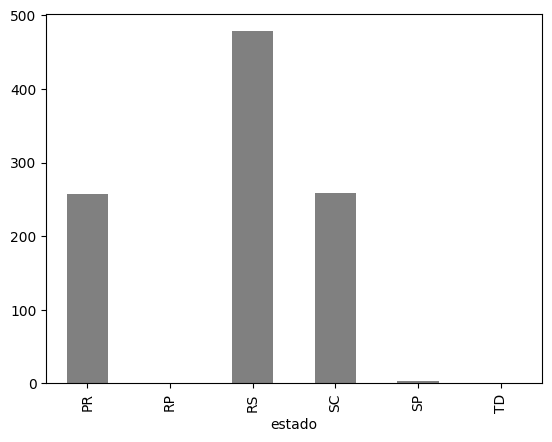

In [7]:
agrupando_estado.plot.bar(color = 'gray')

In [17]:
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

In [18]:
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

<Axes: xlabel='Idade'>

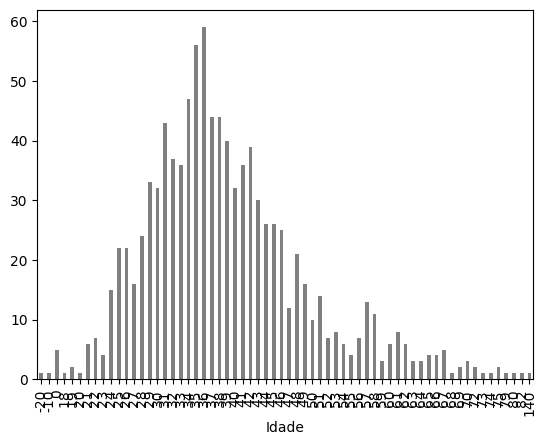

In [19]:
agrupando_idade = dataset.groupby(["Idade"]).size()
agrupando_idade.plot.bar(color = "gray")

In [20]:
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [21]:
dataset.isnull().sum()

Id            0
Score         0
estado        0
Genero        8
Idade         0
Patrimonio    0
Saldo         0
Produtos      0
TemCartao     0
Ativo         0
Salario       7
Saiu          0
dtype: int64

In [31]:
#Tratando salarios faltantes:

mediana = sts.median(dataset["Salario"])

dataset["Salario"] = dataset["Salario"].fillna(mediana)

dataset.isnull().sum()


Id            0
Score         0
estado        0
Genero        8
Idade         0
Patrimonio    0
Saldo         0
Produtos      0
TemCartao     0
Ativo         0
Salario       0
Saiu          0
dtype: int64

In [35]:
#Tratando casos do genero:

agrupando_genero = dataset.groupby(["Genero"]).size()
agrupando_genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [37]:
dataset["Genero"] = dataset["Genero"].fillna("Masculino")

In [43]:
dataset.loc[dataset["Genero"] == "M", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"]. isin(["F", "Fem"]), "Genero"] = "Feminino"


In [44]:
agrupando_genero = dataset.groupby(["Genero"]).size()
agrupando_genero

Genero
Feminino     464
Masculino    535
dtype: int64

In [50]:
#Tratando idades:

agrupando_idades = dataset["Idade"].describe()
agrupando_idades

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [52]:
mediana_idade = sts.median(dataset["Idade"])

In [56]:
dataset.loc[(dataset["Idade"] > 120) | (dataset["Idade"] < 0)] = mediana_idade

In [57]:
agrupando_idades = dataset["Idade"].describe()
agrupando_idades

count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

In [59]:
#Buscando por dados duplicados:

dataset[dataset.duplicated(["Id"], keep = False)]

,Id,Score,estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartao,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [61]:
dataset.drop_duplicates(subset= "Id", keep= "first", inplace= True)

In [62]:
dataset[dataset.duplicated(["Id"], keep = False)]


,Id,Score,estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartao,Ativo,Salario,Saiu


In [65]:
#Buscando estados fora do dominio:

agrupar_estd = dataset.groupby(["estado"]).size()
agrupar_estd

estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [68]:
dataset.loc[dataset["estado"].isin(["RP", "SP", "TD"]), "estado"] = "RS"

In [69]:
agrupar_estd = dataset.groupby(["estado"]).size()
agrupar_estd

estado
PR    257
RS    480
SC    258
dtype: int64